In [1]:
!git clone https://github.com/soumik12345/MIRNet
#Setting up current directory
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 248 (delta 113), reused 166 (delta 46), pack-reused 0
Receiving objects: 100% (248/248), 28.12 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/MIRNet


In [9]:
from google.colab import files
files.upload()

Saving pp (2).jpg to pp (2).jpg


{'pp (2).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x02(ICC_PROFILE\x00\x01\x01\x00\x00\x02\x18\x00\x00\x00\x00\x02\x10\x00\x00mntrRGB XYZ \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00trXYZ\x00\x00\x01d\x00\x00\x00\x14gXYZ\x00\x00\x01x\x00\x00\x00\x14bXYZ\x00\x00\x01\x8c\x00\x00\x00\x14rTRC\x00\x00\x01\xa0\x00\x00\x00(gTRC\x00\x00\x01\xa0\x00\x00\x00(bTRC\x00\x00\x01\xa0\x00\x00\x00(wtpt\x00\x00\x01\xc8\x00\x00\x00\x14cprt\x00\x00\x01\xdc\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x00\x00X\x00\x00\x00\x1c\x00s\x00R\x00G\

In [2]:
!pip install -q wandb

     |████████████████████████████████| 2.0MB 8.9MB/s 
     |████████████████████████████████| 163kB 26.2MB/s 
     |████████████████████████████████| 133kB 33.5MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 


In [3]:
from google.colab.patches import cv2_imshow

In [4]:
from glob import glob  
from PIL import Image  #For image operations
from matplotlib import pyplot as plt #for visualization

# Importing required dependencies from MIRNet
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result
import tensorflow as tf # For modelling
import numpy as np # For mathematical computation

In [5]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(num_rrg=3, num_mrb=2, channels=64,      weights_path='low_light_weights_best.h5')
inferer.model.summary()

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
148MB [00:01, 99.4MB/s]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [10]:
IMAGE_LOC = 'pp (2).jpg'  # change the name of image to you desired image 

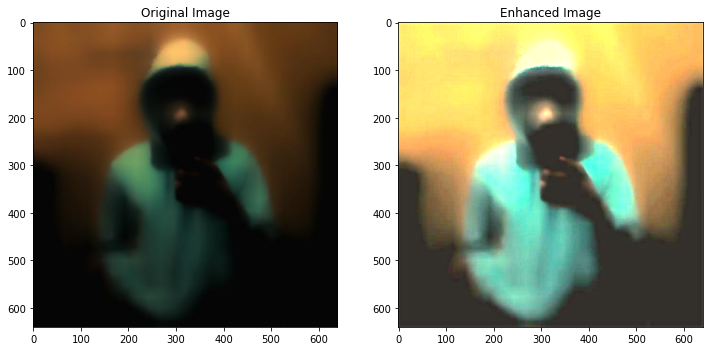

In [11]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)